In [3]:
import pandas as pd

# 🔹 Load your combined ACS file
file_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv"
df = pd.read_csv(file_path)

# --- Clean up ---
df.columns = df.columns.str.strip().str.lower()
df = df.dropna(subset=["wavelength"])  # remove empty wavelength rows
df["wavelength"] = pd.to_numeric(df["wavelength"], errors="coerce")
df = df.dropna(subset=["wavelength"])
df = df.sort_values(["filename", "wavelength"])

# --- Identify parameters present ---
params = [p for p in ["agp", "cgp", "ap", "ag"] if p in df.columns]

# --- Build transposed (pivoted) tables for each parameter ---
pivoted_dfs = []
for param in params:
    pivot = df.pivot_table(index=["filename"], columns="wavelength", values=param)
    pivot.columns = [f"{param}_{int(c)}" for c in pivot.columns]
    pivoted_dfs.append(pivot)

# --- Merge all parameter tables horizontally ---
combined = pd.concat(pivoted_dfs, axis=1).reset_index()

# --- (Optional) add cruise if present ---
if "cruise" in df.columns:
    cruise_map = df.drop_duplicates(subset=["filename"])[["filename", "cruise"]]
    combined = combined.merge(cruise_map, on="filename", how="left")

# --- Reorder columns ---
cols = ["cruise", "filename"] + [c for c in combined.columns if c not in ["cruise", "filename"]]
combined = combined[cols]

# --- Save the final transposed DataFrame ---
output_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_transposed.csv"
combined.to_csv(output_path, index=False)

print(f"✅ Transposed file saved to:\n{output_path}")
print(f"Columns created: {len(combined.columns)} | Rows: {len(combined)}")


KeyError: 'filename'

In [5]:
import pandas as pd

# 🔹 Load your combined ACS file
file_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv"
df = pd.read_csv(file_path)

# --- Clean column names ---
df.columns = df.columns.str.strip().str.lower()

# --- Ensure wavelength is numeric ---
if "wavelength" not in df.columns:
    raise ValueError("❌ 'wavelength' column not found in file — check your CSV headers.")

df["wavelength"] = pd.to_numeric(df["wavelength"], errors="coerce")
df = df.dropna(subset=["wavelength"])

# --- If 'filename' not in columns, create a placeholder ---
if "filename" not in df.columns:
    df["filename"] = "unknown_file"

# --- If 'cruise' not in columns, add it too (optional) ---
if "cruise" not in df.columns:
    df["cruise"] = "unknown_cruise"

# --- Sort safely ---
df = df.sort_values(["filename", "wavelength"])

# --- Identify optical parameters present ---
params = [p for p in ["agp", "cgp", "ap", "ag"] if p in df.columns]

# --- Build transposed (pivoted) tables for each parameter ---
pivoted_dfs = []
for param in params:
    pivot = df.pivot_table(index=["filename"], columns="wavelength", values=param)
    pivot.columns = [f"{param}_{int(c)}" for c in pivot.columns]
    pivoted_dfs.append(pivot)

# --- Merge all parameter tables ---
combined = pd.concat(pivoted_dfs, axis=1).reset_index()

# --- Add cruise info back in ---
cruise_map = df.drop_duplicates(subset=["filename"])[["filename", "cruise"]]
combined = combined.merge(cruise_map, on="filename", how="left")

# --- Reorder columns ---
cols = ["cruise", "filename"] + [c for c in combined.columns if c not in ["cruise", "filename"]]
combined = combined[cols]

# --- Save the transposed DataFrame ---
output_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_transposed.csv"
combined.to_csv(output_path, index=False)

print(f"✅ Transposed file saved successfully at:\n{output_path}")
print(f"Columns created: {len(combined.columns)} | Rows: {len(combined)}")


✅ Transposed file saved successfully at:
/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_transposed.csv
Columns created: 1206 | Rows: 1


In [6]:
import pandas as pd

# 🔹 Load your CSV
file_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv"
df = pd.read_csv(file_path)

# --- Clean and prepare ---
df.columns = df.columns.str.strip().str.lower()

# Keep only relevant columns
cols = [c for c in ["wavelength", "agp", "cgp", "ap", "ag"] if c in df.columns]
df = df[cols]

# Drop NaNs and ensure numeric wavelength
df = df.dropna(subset=["wavelength"])
df["wavelength"] = pd.to_numeric(df["wavelength"], errors="coerce")
df = df.dropna(subset=["wavelength"])

# --- Transpose ---
# Set wavelength as columns, parameter names as rows
df_t = df.set_index("wavelength").T

# Optional: make wavelength column headers integers
df_t.columns = df_t.columns.astype(int)

# --- Save the transposed version ---
output_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_transposed.csv"
df_t.to_csv(output_path)

print(f"✅ Transposed wavelengths saved to:\n{output_path}")
print(f"Shape: {df_t.shape}")
print(df_t.head())


✅ Transposed wavelengths saved to:
/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_transposed.csv
Shape: (4, 11739)
wavelength       400       401       402       403       404       405  \
agp         0.077334  0.077756  0.078085  0.077690  0.078085  0.078085   
cgp         0.219700  0.218710  0.217730  0.216390  0.215540  0.214750   
ap          0.008705  0.009381  0.010058  0.011752  0.012013  0.012232   
ag          0.069318  0.068140  0.066961  0.066425  0.065853  0.065677   

wavelength       406       407       408       409  ...       691       692  \
agp         0.077690  0.077300  0.075613  0.074218  ...  0.010166  0.009759   
cgp         0.214200  0.214160  0.213750  0.213680  ...  0.133130  0.132740   
ap          0.014352  0.014638  0.014827  0.014827  ...  0.009278  0.008959   
ag          0.064252  0.061944  0.060974  0.058606  ...  0.000887  0.000800   

wavelength       693       694       695       696       697       698  \
agp         0.009488  0.009174 

In [7]:
import pandas as pd
from pathlib import Path

# 🔹 Input and output paths
input_path = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv")
output_path = input_path.parent / "wavelength_transposed_with_filename_cruise.csv"

# --- Load and clean ---
df = pd.read_csv(input_path)
df.columns = df.columns.str.strip().str.lower()

# --- Basic checks ---
if "wavelength" not in df.columns:
    raise ValueError("❌ No 'wavelength' column found in the dataset.")

param_cols = [c for c in ["agp", "cgp", "ap", "ag"] if c in df.columns]
if not param_cols:
    raise ValueError("❌ No optical parameter columns found (agp, cgp, ap, ag).")

# --- Handle wavelength values ---
df["wavelength"] = pd.to_numeric(df["wavelength"], errors="coerce")
df = df.dropna(subset=["wavelength"])

# --- Add filename and cruise columns if missing ---
if "filename" not in df.columns:
    df["filename"] = "unknown_file"

if "cruise" not in df.columns:
    # Try to infer cruise name from filename pattern, e.g. "CAH1609_xxx"
    df["cruise"] = df["filename"].str.extract(r"([A-Z]{3}\d{4})", expand=False)
    df["cruise"] = df["cruise"].fillna("unknown_cruise")

# --- Group by filename (and cruise) and transpose ---
output_list = []

for (fname, cruise), group in df.groupby(["filename", "cruise"]):
    # Keep wavelength + parameter columns
    sub = group[["wavelength"] + param_cols].dropna()
    sub = sub.set_index("wavelength").T  # Transpose wavelengths -> columns
    sub.columns = sub.columns.astype(int)  # Make wavelength integer columns

    # Add identifying info
    sub.insert(0, "parameter", sub.index)
    sub.insert(0, "filename", fname)
    sub.insert(0, "cruise", cruise)

    output_list.append(sub.reset_index(drop=True))

# --- Combine all and save ---
final_df = pd.concat(output_list, ignore_index=True)
final_df.to_csv(output_path, index=False)

print(f"✅ Transposed file saved at:\n{output_path}")
print("\n🔍 Preview of transposed table:\n")
print(final_df.head(10))


✅ Transposed file saved at:
/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/wavelength_transposed_with_filename_cruise.csv

🔍 Preview of transposed table:

wavelength          cruise      filename parameter       400       401  \
0           unknown_cruise  unknown_file       agp  0.077334  0.077756   
1           unknown_cruise  unknown_file       cgp  0.219700  0.218710   
2           unknown_cruise  unknown_file        ap  0.008705  0.009381   
3           unknown_cruise  unknown_file        ag  0.069318  0.068140   

wavelength       402       403       404       405       406  ...       691  \
0           0.078085  0.077690  0.078085  0.078085  0.077690  ...  0.010166   
1           0.217730  0.216390  0.215540  0.214750  0.214200  ...  0.133130   
2           0.010058  0.011752  0.012013  0.012232  0.014352  ...  0.009278   
3           0.066961  0.066425  0.065853  0.065677  0.064252  ...  0.000887   

wavelength       692       693       694       695       696       697  \


In [8]:
import pandas as pd
from pathlib import Path

# 🔹 Define the folder path
data_folder = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv")

# 🔹 List of specific files to process
files_to_process = ["CAH1609_31009_acs_R2.csv", "CAH1609_31015_acs_R2.csv", "CAH1609_31022_acs_R2", "CAH1609_31033_acs_R2", "CAH1609_31004_acs_R2", "CAH1609_31018_acs_R2","CAH1609_31001_acs_R2","CAH1609_31036_acs_R2","CAH1609_31027_acs_R2"]

# 🔹 Output path
output_path = data_folder / "CAH1609_transposed.csv"

# 🔹 Initialize list for all file results
transposed_blocks = []

for fname in files_to_process:
    fpath = data_folder / fname

    if not fpath.exists():
        print(f"⚠️ File not found: {fpath}")
        continue

    # --- Load CSV ---
    df = pd.read_csv(fpath)
    df.columns = df.columns.str.strip().str.lower()

    # --- Keep only needed columns ---
    keep_cols = [col for col in ["wavelength", "cgp", "agp", "ap", "ag"] if col in df.columns]
    if len(keep_cols) < 2:
        print(f"⚠️ Skipping {fname} — missing optical columns.")
        continue

    df = df[keep_cols].dropna(subset=["wavelength"])
    df["wavelength"] = pd.to_numeric(df["wavelength"], errors="coerce")
    df = df.dropna(subset=["wavelength"]).sort_values("wavelength")

    # --- Transpose wavelengths as columns ---
    df_t = df.set_index("wavelength").T
    df_t.columns = df_t.columns.astype(int)  # wavelength → int

    # --- Add metadata columns ---
    cruise = fname.split("_")[0]  # Extract cruise name like "CAH1609"
    df_t.insert(0, "parameter", df_t.index)
    df_t.insert(0, "filename", fname)
    df_t.insert(0, "cruise", cruise)

    transposed_blocks.append(df_t.reset_index(drop=True))

# --- Combine all results ---
if transposed_blocks:
    final_df = pd.concat(transposed_blocks, ignore_index=True)
    final_df.to_csv(output_path, index=False)
    print(f"✅ Transposed dataset saved to:\n{output_path}")
    print("\n🔍 Preview:")
    print(final_df.head(10))
else:
    print("❌ No valid data blocks found to transpose.")


⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31009_acs_R2.csv
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31015_acs_R2.csv
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31022_acs_R2
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31033_acs_R2
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31004_acs_R2
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31018_acs_R2
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31001_acs_R2
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31036_acs_R2
⚠️ File not found: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/CAH1609_31027_acs_R2
❌ No valid data bloc

In [9]:
import pandas as pd
from pathlib import Path

# 🔹 Define your main path (file or folder)
data_path = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv")

# --- Detect if the path is a file or a folder ---
if data_path.is_file():
    data_folder = data_path.parent
else:
    data_folder = data_path

# 🔹 Automatically find all *_acs_R2* files in this folder
files_to_process = list(data_folder.glob("*_acs_R2*.csv"))

# If no CSVs found, let’s log it
if not files_to_process:
    print(f"⚠️ No '_acs_R2' CSV files found in {data_folder}")
else:
    print(f"🔹 Found {len(files_to_process)} files to process.")

# 🔹 Output path
output_path = data_folder / "CAH1609_transposed.csv"

# 🔹 Initialize list for all file results
transposed_blocks = []

for fpath in files_to_process:
    fname = fpath.name
    print(f"Processing → {fname}")

    try:
        df = pd.read_csv(fpath)
        df.columns = df.columns.str.strip().str.lower()
    except Exception as e:
        print(f"⚠️ Could not read {fname}: {e}")
        continue

    # --- Keep only needed columns ---
    keep_cols = [col for col in ["wavelength", "cgp", "agp", "ap", "ag"] if col in df.columns]
    if len(keep_cols) < 2:
        print(f"⚠️ Skipping {fname} — missing optical columns.")
        continue

    df = df[keep_cols].dropna(subset=["wavelength"])
    df["wavelength"] = pd.to_numeric(df["wavelength"], errors="coerce")
    df = df.dropna(subset=["wavelength"]).sort_values("wavelength")

    # --- Transpose wavelengths as columns ---
    df_t = df.set_index("wavelength").T
    df_t.columns = df_t.columns.astype(int)

    # --- Add metadata columns ---
    cruise = fname.split("_")[0]  # Extract cruise name like "CAH1609"
    df_t.insert(0, "parameter", df_t.index)
    df_t.insert(0, "filename", fname)
    df_t.insert(0, "cruise", cruise)

    transposed_blocks.append(df_t.reset_index(drop=True))

# --- Combine and export ---
if transposed_blocks:
    final_df = pd.concat(transposed_blocks, ignore_index=True)
    final_df.to_csv(output_path, index=False)
    print(f"✅ Transposed dataset saved to:\n{output_path}")
    print("\n🔍 Preview:")
    print(final_df.head(10))
else:
    print("❌ No valid data blocks found to transpose.")


⚠️ No '_acs_R2' CSV files found in /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609
❌ No valid data blocks found to transpose.


In [12]:
import pandas as pd
from pathlib import Path

# ✅ FIX: Point to the folder, not a file
base_folder = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv")

# 🔹 2. Find all "_acs_R2.csv" files recursively
acs_r2_files = [f for f in base_folder.rglob("*_acs_R2.csv")]

# 🔹 3. Create output folder for transposed results
output_folder = base_folder / "transposed_results"
output_folder.mkdir(exist_ok=True)

# 🔹 4. Process each file
for file in acs_r2_files:
    df = pd.read_csv(file)
    df.columns = [c.strip().lower() for c in df.columns]  # normalize column names
    
    required_cols = {'wavelength', 'agp', 'cgp', 'ag', 'ap'}
    if not required_cols.issubset(df.columns):
        print(f"⚠️ Skipping {file.name}: missing one of {required_cols}")
        continue
    
    # 🔹 5. Transpose so wavelength values become columns
    df_t = df.set_index('wavelength')[['agp', 'cgp', 'ag', 'ap']].T
    
    # 🔹 6. Add the filename (without extension) as an identifying column
    df_t.insert(0, 'source_file', file.stem)
    
    # 🔹 7. Save transposed file (non-destructive)
    output_path = output_folder / f"{file.stem}_transposed.csv"
    df_t.to_csv(output_path, index=True)
    
    print(f"✅ Transposed and saved: {output_path.name}")


NotADirectoryError: [Errno 20] Not a directory: '/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_acs.csv/transposed_results'

In [23]:
import pandas as pd
from pathlib import Path

# 🔹 1. Folder containing your ACS CSVs
folder = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/")

# 🔹 2. Find all "_acs_R2.csv" files
acs_r2_files = list(folder.rglob("*_acs_R2.csv"))

# 🔹 3. List to collect transposed DataFrames
all_transposed = []

# 🔹 4. Process each file
for file in acs_r2_files:
    df = pd.read_csv(file)
    df.columns = [c.strip().lower() for c in df.columns]  # normalize column names

    required_cols = {'wavelength', 'agp', 'cgp', 'ag', 'ap'}
    if not required_cols.issubset(df.columns):
        print(f"⚠️ Skipping {file.name}: missing one of {required_cols}")
        continue

    # 🔹 Sort by wavelength numerically
    df = df.sort_values(by='wavelength')

    # 🔹 Select only desired columns
    df_selected = df[['wavelength', 'cgp', 'agp', 'ag', 'ap']]

    # 🔹 Transpose: wavelengths become columns, rows = cgp, agp, ag, ap
    df_t = df_selected.set_index('wavelength').T

    # 🔹 Add source file name for identification
    df_t.insert(0, 'source_file', file.stem)

    # 🔹 Collect for master CSV
    all_transposed.append(df_t)

# 🔹 5. Merge all transposed DataFrames into one master DataFrame
if all_transposed:
    master_df = pd.concat(all_transposed, ignore_index=True)
    master_csv_path = folder / "ACS_R2_Transposed_Master.csv"
    master_df.to_csv(master_csv_path, index=False)
    print(f"✅ Master CSV created: {master_csv_path}")
else:
    print("⚠️ No valid ACS R2 files found to merge.")


✅ Master CSV created: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/ACS_R2_Transposed_Master.csv


In [26]:
import pandas as pd
from pathlib import Path

# 🔹 1. Folder containing your ACS CSVs
folder = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609")

# 🔹 2. Find all "_acs_R2.csv" files
acs_r2_files = list(folder.rglob("*_acs_R2.csv"))

# 🔹 3. List to collect transposed DataFrames
all_transposed = []

# 🔹 4. Process each file
for file in acs_r2_files:
    df = pd.read_csv(file)
    df.columns = [c.strip().lower() for c in df.columns]  # normalize column names

    required_cols = {'wavelength', 'agp', 'cgp', 'ag', 'ap'}
    if not required_cols.issubset(df.columns):
        print(f"⚠️ Skipping {file.name}: missing one of {required_cols}")
        continue

    # 🔹 Sort by wavelength numerically
    df = df.sort_values(by='wavelength')

    # 🔹 Transpose the desired columns
    df_values = df[['cgp', 'agp', 'ap', 'ag']].T
    df_values.columns = df['wavelength']  # set wavelengths as column headers

    # 🔹 Add source_file as first column
    df_values.insert(0, 'source_file', file.stem)

    # 🔹 Append to list
    all_transposed.append(df_values)

# 🔹 5. Combine all transposed DataFrames
if all_transposed:
    master_df = pd.concat(all_transposed, ignore_index=True)
    master_csv_path = folder / "ACS_R2_Transposed_Master.csv"
    master_df.to_csv(master_csv_path, index=False)
    print(f"✅ Master CSV created: {master_csv_path}")
else:
    print("⚠️ No valid ACS R2 files found to merge.")


✅ Master CSV created: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/ACS_R2_Transposed_Master.csv


In [44]:
import pandas as pd
from pathlib import Path

# 🔹 1. Folder containing your ACS CSVs
folder = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609")

# 🔹 2. Find all "_acs_R2.csv" files
acs_r2_files = list(folder.rglob("*_acs_R2.csv"))

# 🔹 3. List to collect transposed DataFrames
all_transposed = []

# 🔹 4. Process each file
for file in acs_r2_files:
    df = pd.read_csv(file)
    df.columns = [c.strip().lower() for c in df.columns]  # normalize column names

    required_cols = {'wavelength', 'agp', 'cgp', 'ag', 'ap'}
    if not required_cols.issubset(df.columns):
        print(f"⚠️ Skipping {file.name}: missing one of {required_cols}")
        continue

    # 🔹 Sort by wavelength numerically
    df = df.sort_values(by='wavelength')

    # 🔹 Transpose the desired columns
    df_values = df[['cgp', 'agp', 'ag', 'ap']].T
    df_values.columns = df['wavelength']  # set wavelengths as column headers

    # 🔹 Add source_file as first column
    df_values.insert(0, 'source_file', file.stem)

    # 🔹 Add parameter name as second column
    df_values.insert(1, 'parameter', df_values.index)

    # 🔹 Append to list
    all_transposed.append(df_values)

# 🔹 5. Combine all transposed DataFrames
if all_transposed:
    master_df = pd.concat(all_transposed, ignore_index=True)
    master_csv_path = folder / "ACS_R2_Transposed_Master.csv"
    master_df.to_csv(master_csv_path, index=False)
    print(f"✅ Master CSV created: {master_csv_path}")
else:
    print("⚠️ No valid ACS R2 files found to merge.")


✅ Master CSV created: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/ACS_R2_Transposed_Master.csv


In [43]:
import pandas as pd
from pathlib import Path

# 🔹 1. Folder containing your VSF CSVs
folder = Path("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CPA1705")

# 🔹 2. Find all "_vsf_R2.csv" files
vsf_r2_files = list(folder.rglob("*_vsf_R2.csv"))

# 🔹 3. List to collect transposed DataFrames
all_transposed = []

# 🔹 4. Process each file
for file in vsf_r2_files:
    try:
        df = pd.read_csv(file)
        df.columns = [c.strip().lower() for c in df.columns]  # normalize column names

        # 🔹 Identify possible sorting & wavelength columns
        wavelength_col = 'wavelength' if 'wavelength' in df.columns else None
        serial_col = 'serial' if 'serial' in df.columns else None

        # 🔹 Required optical columns (bbp, bbp_bp)
        value_cols = [col for col in ['bbp', 'bbp_bp'] if col in df.columns]
        if not value_cols:
            print(f"⚠️ Skipping {file.name}: missing 'bbp' or 'bbp_bp' columns.")
            continue

        # 🔹 Sort by serial if available, otherwise by wavelength
        if serial_col:
            df = df.sort_values(by=serial_col)
        elif wavelength_col:
            df = df.sort_values(by=wavelength_col)
        else:
            print(f"⚠️ Skipping {file.name}: no serial or wavelength column found.")
            continue

        # 🔹 Use wavelength or serial for column headers
        if wavelength_col:
            col_headers = df[wavelength_col]
        else:
            col_headers = df[serial_col]

        # 🔹 Transpose selected columns
        df_values = df[value_cols].T
        df_values.columns = col_headers  # wavelength/serial values as headers

        # 🔹 Add identifying columns
        df_values.insert(0, 'source_file', file.stem)
        df_values.insert(1, 'parameter', df_values.index)

        # 🔹 Append to list
        all_transposed.append(df_values)

    except Exception as e:
        print(f"❌ Error processing {file.name}: {e}")

# 🔹 5. Combine all transposed DataFrames into one master file
if all_transposed:
    master_df = pd.concat(all_transposed, ignore_index=True)
    master_csv_path = folder / "VSF_R2_BBP_Transposed_Master.csv"
    master_df.to_csv(master_csv_path, index=False)
    print(f"✅ Master CSV created successfully: {master_csv_path}")
else:
    print("⚠️ No valid VSF R2 files found to merge.")


✅ Master CSV created successfully: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CPA1705/VSF_R2_BBP_Transposed_Master.csv


In [49]:
import pandas as pd

# Load the CSV
file_path = "/Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAH1609/combined_rrs_CAH1609.csv"
df = pd.read_csv(file_path)

# Check the first few rows to understand the structure
print(df.head())

# Assuming the CSV has columns: 'Serial', 'Wavelength', 'RRS'
# Pivot the table: rows = Serial, columns = Wavelength, values = RRS
df_transposed = df.pivot(index='Serial', columns='Wavelength', values='RRS')

# Optional: reset column names if needed
df_transposed.columns = [f"{col}" for col in df_transposed.columns]

# Save the transposed CSV
df_transposed.to_csv("transposed_rrs_CAH1609.csv")

print("Transposed CSV saved as transposed_rrs_CAH1609.csv")


         source_file  wavelength       rrs    rrs_sd
0  CAH1609_31003_Rrs      351.02  0.019861  0.005685
1  CAH1609_31003_Rrs      354.41  0.020680  0.005961
2  CAH1609_31003_Rrs      357.80  0.021405  0.006245
3  CAH1609_31003_Rrs      361.19  0.022407  0.006557
4  CAH1609_31003_Rrs      364.58  0.023628  0.006961


KeyError: 'Serial'

In [56]:
# Create dictionary
data_dict = {
    'source_files': df['source_file'].tolist(),
    'wavelengths': df['wavelength'].tolist(),
    'rrs': df['rrs'].tolist()
}

# Optional: check the first few entries
print({k: v[:5] for k, v in data_dict.items()})

{'source_files': ['CAH1609_31003_Rrs', 'CAH1609_31003_Rrs', 'CAH1609_31003_Rrs', 'CAH1609_31003_Rrs', 'CAH1609_31003_Rrs'], 'wavelengths': [351.02, 354.41, 357.8, 361.19, 364.58], 'rrs': [0.0198608367935, 0.0206800010727, 0.0214052307005, 0.0224065269979, 0.0236277875539]}


In [ ]:
# Convert dictionary back to DataFrame
df_long = pd.DataFrame({
    'source_file': data_dict['source_files'],
    'wavelength': data_dict['wavelengths'],
    'rrs': data_dict['rrs']
})


wave

In [58]:
df_wide.head()

,CAH1609_31001_Rrs,CAH1609_31002_Rrs,CAH1609_31003_Rrs,CAH1609_31004_Rrs,CAH1609_31005_Rrs,CAH1609_31006_Rrs,CAH1609_31007_Rrs,CAH1609_31008_Rrs,CAH1609_31009_Rrs,CAH1609_31010_Rrs,...,CAH1609_31032_Rrs,CAH1609_31033_Rrs,CAH1609_31034_Rrs,CAH1609_31035_Rrs,CAH1609_31036_Rrs,CAH1609_31037_Rrs,CAH1609_31038_Rrs,CAH1609_31039_Rrs,CAH1609_31040_Rrs,CAH1609_31041_Rrs
wavelength,,,,,,,,,,,,,,,,,,,,,
351.02,0.007685,0.016758,0.019861,0.011864,0.016954,0.005438,0.005018,0.005006,0.006170,0.004575,...,0.014142,0.023325,0.013710,0.013666,0.004843,0.006049,0.022956,0.007788,0.007107,0.007918
354.41,0.008115,0.017713,0.020680,0.012306,0.017618,0.005508,0.005100,0.005096,0.006270,0.004657,...,0.014644,0.024281,0.014310,0.014245,0.004944,0.006544,0.024023,0.008270,0.007460,0.008342
357.80,0.008547,0.018601,0.021405,0.012714,0.018199,0.005568,0.005162,0.005170,0.006365,0.004735,...,0.015087,0.025036,0.014902,0.014824,0.005029,0.007017,0.024933,0.008772,0.007804,0.008767
361.19,0.009110,0.019751,0.022407,0.013256,0.018955,0.005679,0.005267,0.005294,0.006514,0.004877,...,0.015698,0.026003,0.015631,0.015597,0.005139,0.007640,0.026195,0.009426,0.008209,0.009278
364.58,0.009787,0.021073,0.023628,0.013911,0.019887,0.005848,0.005435,0.005481,0.006744,0.005064,...,0.016488,0.027206,0.016451,0.016509,0.005295,0.008422,0.027729,0.010215,0.008654,0.009802


In [70]:
import pandas as pd

# Your lists
source_files = data_dict['source_files']  # not used as column names here, unless you want
wavelengths = data_dict['wavelengths']
rrs = data_dict['rrs']

# Create DataFrame with two rows
df_two_rows = pd.DataFrame([wavelengths, rrs], index=['wavelength', 'rrs'])

# Optional: assign column names (e.g., 'col_1', 'col_2', ...)
df_two_rows.columns = [f'{source_files[i]}' for i in range(len(wavelengths))]

# Save as CSV
df_two_rows.to_csv("/Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAH1609/combined_rrs.csv")

In [68]:
df_two_rows.head(5)

,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,CAH1609_31003_Rrs,...,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs,CAH1609_31039_Rrs
wavelength,351.020000,354.41000,357.800000,361.190000,364.580000,367.97000,371.360000,374.750000,378.140000,381.530000,...,771.520000,774.880000,778.250000,781.61000,784.970000,788.340000,791.700000,795.060000,798.420000,801.770000
rrs,0.019861,0.02068,0.021405,0.022407,0.023628,0.02478,0.025051,0.025608,0.026584,0.027103,...,0.000135,0.000142,0.000138,0.00014,0.000158,0.000165,0.000166,0.000164,0.000178,0.000181


In [74]:
import pandas as pd
from pathlib import Path

# Input and output folders
input_folder = Path("/Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAL1609/")
output_folder = input_folder / "processed"
output_folder.mkdir(exist_ok=True)

# Loop through all CSV files
for file_path in input_folder.glob("*.csv"):
    try:
        df = pd.read_csv(file_path)

        # Standardize column names: strip spaces, lowercase
        df.columns = df.columns.str.strip().str.lower()

        # Identify the source file column
        if 'source_file' in df.columns:
            source_col = 'source_file'
        elif 'filename' in df.columns:
            source_col = 'filename'
        else:
            print(f"⚠️ Skipping {file_path.name} – no 'source_file' or 'filename' column found")
            continue

        # Check required columns
        if 'wavelength' not in df.columns or 'rrs' not in df.columns:
            print(f"⚠️ Skipping {file_path.name} – missing 'wavelength' or 'rrs' columns")
            continue

        # Create dictionary
        data_dict = {
            'source_files': df[source_col].tolist(),
            'wavelengths': df['wavelength'].tolist(),
            'rrs': df['rrs'].tolist()
        }

        # Create two-row DataFrame
        df_two_rows = pd.DataFrame([data_dict['wavelengths'], data_dict['rrs']], index=['wavelength', 'rrs'])
        df_two_rows.columns = [f'{data_dict["source_files"][i]}' for i in range(len(data_dict['wavelengths']))]

        # Save CSV
        output_file = output_folder / f"{file_path.stem}_two_rows.csv"
        df_two_rows.to_csv(output_file)
        print(f"✅ Processed and saved: {output_file}")

    except Exception as e:
        print(f"❌ Error processing {file_path.name}: {e}")


✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAL1609/processed/combined_rrs1_two_rows.csv
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAL1609/processed/combined_rrs_CAL1609_two_rows.csv


In [77]:
import pandas as pd
from pathlib import Path

# Base folder containing all archives
base_folder = Path("/Users/tuba/Downloads/UMB_Boston/lee/CORAL/")

# Loop through all folders inside base
for archive_folder in base_folder.iterdir():
    if archive_folder.is_dir():
        print(f"Processing archive: {archive_folder.name}")

        # Create processed folder
        output_folder = archive_folder / "processed"
        output_folder.mkdir(exist_ok=True)

        # Loop through CSV files in this archive
        for file_path in archive_folder.glob("*.csv"):
            try:
                df = pd.read_csv(file_path)

                # Standardize column names
                df.columns = df.columns.str.strip().str.lower()

                # Check required columns
                if 'wavelength' not in df.columns or 'rrs' not in df.columns:
                    print(f"⚠️ Skipping {file_path.name} – missing 'wavelength' or 'rrs'")
                    continue

                # Use filename as the source_file
                source_file = file_path.stem

                # Create two-row DataFrame
                df_two_rows = pd.DataFrame([df['wavelength'].tolist(), df['rrs'].tolist()],
                                           index=['wavelength', 'rrs'])
                df_two_rows.columns = [f'{source_file}_{i+1}' for i in range(len(df_two_rows.columns))]

                # Save CSV
                output_file = output_folder / f"{source_file}_two_rows.csv"
                df_two_rows.to_csv(output_file)
                print(f"✅ Processed and saved: {output_file}")

            except Exception as e:
                print(f"❌ Error processing {file_path.name}: {e}")


Processing archive: CAH1609
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAH1609/processed/combined_rrs_CAH1609_two_rows.csv
⚠️ Skipping combined_rrs.csv – missing 'wavelength' or 'rrs'
Processing archive: CPA1705
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CPA1705/processed/combined_rrs_CPA1705_two_rows.csv
Processing archive: CAL1609
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAL1609/processed/combined_rrs1_two_rows.csv
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CAL1609/processed/combined_rrs_CAL1609_two_rows.csv
Processing archive: CHI1606
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CHI1606/processed/combined_rrs_CHI1606_two_rows.csv
Processing archive: CGU1704
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CGU1704/processed/combined_rrs_cleaned_two_rows.csv
✅ Processed and saved: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CGU1704/processed/combined_rrs_C

In [88]:
import pandas as pd

# Read the uploaded CSV
df = pd.read_csv("/Users/tuba/Downloads/UMB_Boston/lee/CORAL/CPA1705/combined_rrs_CPA1705_1.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Group by 'source_file' and collect lists of wavelengths and rrs
grouped = df.groupby('source_file').agg({
    'wavelength': list,
    'rrs': list
})

# Create new dataframe for transposed structure
transposed_df = pd.DataFrame({
    col: [",".join(map(str, grouped.loc[col, 'wavelength'])),
          ",".join(map(str, grouped.loc[col, 'rrs']))]
    for col in grouped.index
}, index=['wavelength', 'rrs'])

# Save to CSV
output_path = "/Users/tuba/Downloads/UMB_Boston/lee/CORAL/CPA1705/combined_rrs_CPA1705.csv"
transposed_df.to_csv(output_path)

print("✅ Transposed CSV saved at:", output_path)


✅ Transposed CSV saved at: /Users/tuba/Downloads/UMB_Boston/lee/CORAL/CPA1705/combined_rrs_CPA1705.csv


In [94]:
import pandas as pd

# Load the CSVs
combined_vsf_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_vsf.csv"
master_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/VSF_R2_BBP_Transposed_Master.csv"

combined_vsf = pd.read_csv(combined_vsf_path)
master = pd.read_csv(master_path)

# Identify wavelength columns (numeric)
wavelength_cols = [col for col in combined_vsf.columns if str(col).isdigit()]

# Prepare master-style output
output_rows = []
for _, row in combined_vsf.iterrows():
    source_file = row["source_file"] if "source_file" in combined_vsf.columns else "Unknown"
    bbp_values = row[wavelength_cols].to_dict()
    record = {"source_file": source_file, "parameter": "bbp_bp"}
    record.update(bbp_values)
    output_rows.append(record)

# Create final DataFrame
final_df = pd.DataFrame(output_rows)

# Match master column order
ordered_cols = ["source_file", "parameter"] + [
    col for col in master.columns 
    if col not in ["source_file", "parameter"] and col in final_df.columns
]
final_df = final_df[ordered_cols]

# Save to CSV
output_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/CAH1609_combined_vsf_transposed_full.csv"
final_df.to_csv(output_path, index=False)

print("✅ Transposed file saved as:", output_path)
print(final_df.head())


✅ Transposed file saved as: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/CAH1609_combined_vsf_transposed_full.csv
            source_file parameter
0  CAH1609_31030_vsf_R2    bbp_bp
1  CAH1609_31030_vsf_R2    bbp_bp
2  CAH1609_31030_vsf_R2    bbp_bp
3  CAH1609_31007_vsf_R2    bbp_bp
4  CAH1609_31007_vsf_R2    bbp_bp


In [100]:
import pandas as pd

# 🔹 Step 1: Read your data
combined_vsf_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/combined_vsf.csv"
df = pd.read_csv(combined_vsf_path)

# 🔹 Step 2: Clean and normalize column names
df.columns = df.columns.str.strip().str.lower()  # remove spaces and lowercase for matching
print("Detected columns:", df.columns.tolist())  # helpful check

# 🔹 Step 3: Identify likely column names
source_col = [c for c in df.columns if "source" in c][0]
wave_col = [c for c in df.columns if "wave" in c][0]
bbp_col = [c for c in df.columns if "bbp" in c][0]

print(f"Using columns → source: {source_col}, wavelength: {wave_col}, bbp_bp: {bbp_col}")

# 🔹 Step 4: Pivot (transpose)
df_wide = df.pivot(index=source_col, columns=wave_col, values=bbp_col).reset_index()

# 🔹 Step 5: Add parameter column
df_wide.insert(1, "parameter", "bbp_bp")

# 🔹 Step 6: Sort wavelength columns numerically
numeric_cols = sorted([c for c in df_wide.columns if str(c).isdigit()], key=int)
df_wide = df_wide[["source_file", "parameter"] + numeric_cols]

# 🔹 Step 7: Save output
output_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/CAH1609_combined_vsf_transposed_full.csv"
df_wide.to_csv(output_path, index=False)

print("✅ Transposed file saved at:", output_path)
print(df_wide.head())


Detected columns: ['source_file', 'wavelength', 'bbp', 'bbp_sd', 'bbp_bp', 'bbp_bp_sd']
Using columns → source: source_file, wavelength: wavelength, bbp_bp: bbp
✅ Transposed file saved at: /Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/CAH1609_combined_vsf_transposed_full.csv
wavelength           source_file parameter       470       532       660
0           CAH1609_31001_vsf_R2    bbp_bp  0.012746  0.010904  0.008850
1           CAH1609_31002_vsf_R2    bbp_bp  0.008591  0.007442  0.006207
2           CAH1609_31003_vsf_R2    bbp_bp  0.009099  0.008374  0.007097
3           CAH1609_31004_vsf_R2    bbp_bp  0.009447  0.008341  0.007239
4           CAH1609_31005_vsf_R2    bbp_bp  0.005302  0.004605  0.003903


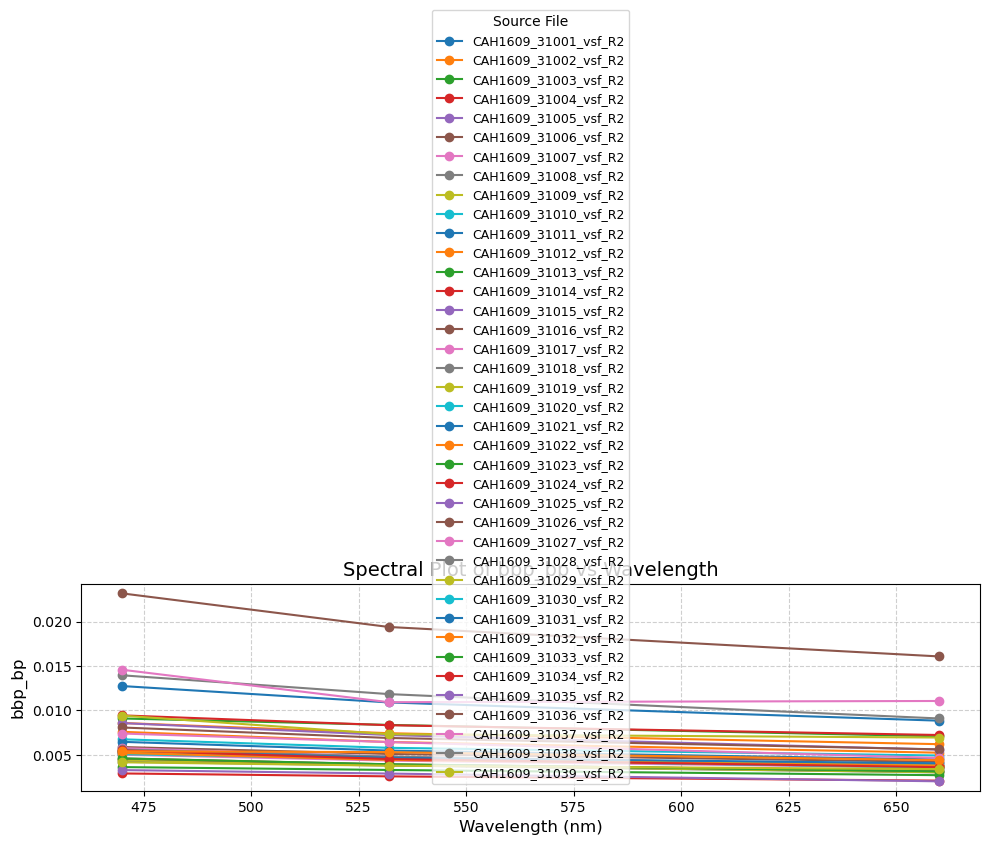

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Step 1: Load your CSV file
file_path = "/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAH1609/CAH1609_combined_vsf_transposed_full.csv"
df = pd.read_csv(file_path)

# 🔹 Step 2: Clean column names (remove spaces and lowercase for consistency)
df.columns = df.columns.str.strip()

# Try to detect the source_file column automatically
possible_sources = [c for c in df.columns if "source" in c.lower()]
source_col = possible_sources[0] if possible_sources else df.columns[0]

# 🔹 Step 3: Detect numeric wavelength columns
wavelength_cols = [c for c in df.columns if c.replace('.', '', 1).isdigit()]
if not wavelength_cols:
    raise ValueError("No numeric wavelength columns found!")

# Sort numerically for a proper X-axis
wavelength_cols = sorted(wavelength_cols, key=lambda x: float(x))
wavelengths = [float(w) for w in wavelength_cols]

# 🔹 Step 4: Plot each source_file’s bbp_bp spectrum
plt.figure(figsize=(10, 6))

for _, row in df.iterrows():
    source = row[source_col]
    values = row[wavelength_cols].astype(float).values
    plt.plot(wavelengths, values, marker='o', label=source)

# 🔹 Step 5: Customize and display
plt.title("Spectral Plot of bbp_bp vs Wavelength", fontsize=14)
plt.xlabel("Wavelength (nm)", fontsize=12)
plt.ylabel("bbp_bp", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Source File", fontsize=9)
plt.tight_layout()
plt.show()


In [103]:
import pandas as pd

# 🔹 1. Load the CSV
df = pd.read_csv("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAL1609/combined_vsf.csv")

# 🔹 2. Inspect the columns to confirm structure
print(df.head())
# We assume columns like: ['source_file', 'wavelength', 'bbp']

# 🔹 3. Pivot the table: wavelengths as columns, bbp values as values
df_pivot = df.pivot(index='source_file', columns='wavelength', values='bbp')

# 🔹 4. Optional: reset index to make 'source_file' a column again
df_pivot.reset_index(inplace=True)

# 🔹 5. Save the transposed data to a new CSV
df_pivot.to_csv("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAL1609/transposed_bbp.csv", index=False)

print("✅ Transposition complete. Saved as 'transposed_bbp.csv'")


            source_file  wavelength       bbp    bbp_sd    bbp_bp  bbp_bp_sd
0  CAL1609_21011_vsf_R2         470  0.009928  0.000531  0.033260   0.001780
1  CAL1609_21011_vsf_R2         532  0.008712  0.000835  0.030292   0.002903
2  CAL1609_21011_vsf_R2         660  0.006950  0.000640  0.028527   0.002628
3  CAL1609_21026_vsf_R2         470  0.010619  0.000679  0.035000   0.002239
4  CAL1609_21026_vsf_R2         532  0.009199  0.000600  0.031227   0.002037
✅ Transposition complete. Saved as 'transposed_bbp.csv'


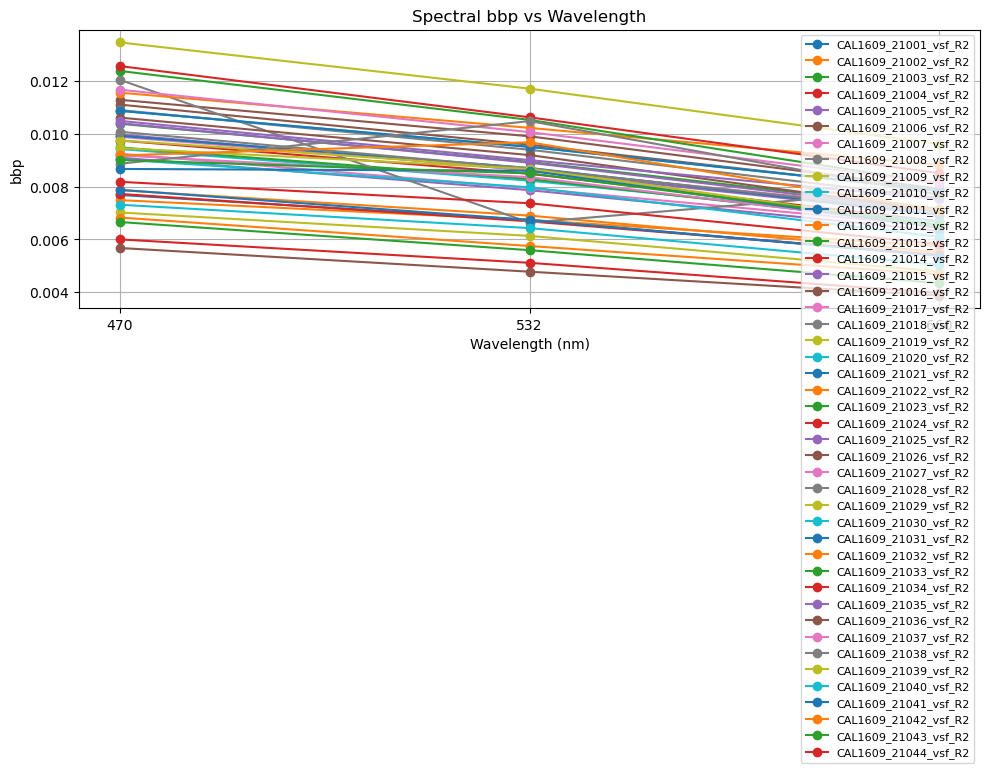

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 1. Load the transposed CSV
df = pd.read_csv("/Users/tuba/Downloads/UCONN/Dierssen/CORAL/CAL1609/transposed_bbp.csv")

# 🔹 2. Separate the source column from wavelength columns
source_col = 'source_file'
wavelength_cols = [col for col in df.columns if col != source_col]

# 🔹 3. Plot each source
plt.figure(figsize=(10, 6))

for _, row in df.iterrows():
    plt.plot(wavelength_cols, row[wavelength_cols], marker='o', label=row[source_col])

# 🔹 4. Customize plot
plt.xlabel("Wavelength (nm)")
plt.ylabel("bbp")
plt.title("Spectral bbp vs Wavelength")
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)

# 🔹 5. Show plot
plt.tight_layout()
plt.show()
